In [2]:
from utils.result import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.io import loadmat
%reload_ext autoreload
%autoreload 2
stimuli = ['0-BEA', '0-BOL', '0-Ctl', '1-DatExt', '0-FAR', '0-GER', '0-ISO', '0-LIN', 
           '0-M2', '0-M3', '0-M4', '0-M5', '0-M6', '0-MAL', '0-MYR', '0-NER', 
           '1-P3', '1-P4', '1-P5', '1-P9', '1-P9_Hund', '1-P9_Ten', '1-P9_TenThous']		

mixture_dict = {"1-P9":["0-BEA","0-BOL","0-MAL","0-MYR","0-LIN","0-NER","0-GER","0-ISO","0-FAR"],
                "1-P5":["0-BEA","0-BOL","0-LIN","0-NER","0-GER"],
                "1-P4":["0-BEA","0-BOL","0-LIN","0-NER"],
                "1-P3":["0-BEA","0-BOL","0-LIN"],
                "0-M6":["0-MAL","0-MYR","0-NER","0-GER","0-ISO","0-FAR"],
                "0-M5":["0-MAL","0-MYR","0-GER","0-ISO","0-FAR"],
                "0-M4":["0-MAL","0-MYR","0-ISO","0-FAR"],
                "0-M3":["0-MAL","0-ISO","0-FAR"],
                "0-M2":["0-BEA","0-BOL"]}


In [2]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    att_betai, _, att_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070921/attflow/attflow-{}.yaml".format(target), 
                                                                   cond=False)
    spa_att_betai, _, spa_att_ensemble, _, _ = analyze_betai(yaml_filepath="config/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target), 
                                                                   cond=False)
    attcond_betai, _, attcond_ensemble, _, _ = analyze_betai(yaml_filepath="config/070921/attflow/attflow-{}.yaml".format(target),
                                                                               cond=True)
    spa_attcond_betai, _, spa_attcond_ensemble, _, _ = analyze_betai(yaml_filepath="config/070921/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    
    dur_attcond_stim_ensemble_average.append(attcond_ensemble)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    #plot_ensemble([att_ensemble, spa_att_ensemble,attcond_ensemble, spa_attcond_ensemble], 
    #              ["attflow","sparse-attflow", "Cond-attflow","Cond-spa-attflow"], 
    #              target,
    #              q_labels=stimuli,
    #             
    #              neurons=neurons,
    #              section="During")

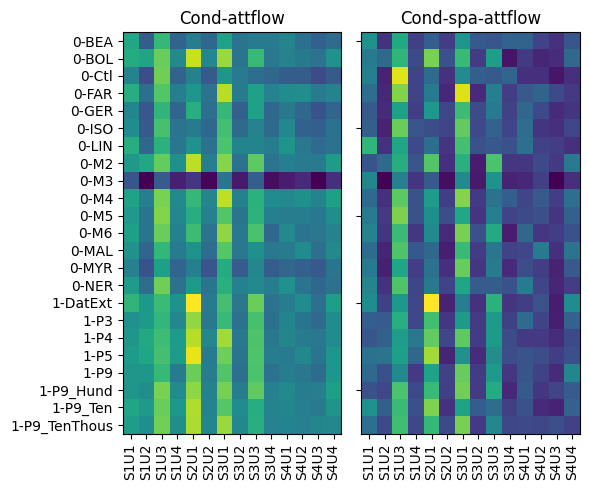

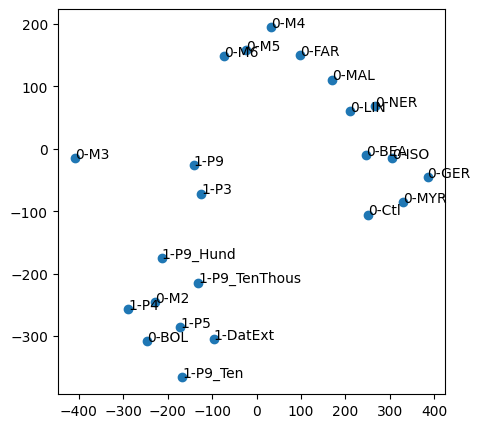

In [3]:
plot_ensemble([np.mean(dur_attcond_stim_ensemble_average,0), np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-attflow","Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")
#plt.savefig("betai_condflow.pdf", bbox_inches="tight")

mean_stim_beta = np.array(dur_attcond_stim_ensemble_average).mean(0).mean(0)
mean_stim_beta_dict = {}
tsne = TSNE(n_components=2, perplexity=5)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    mean_stim_beta_dict[stimuli[i]] = mean_stim_beta[i]
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
    
#plt.savefig("2dTSNE_betai.pdf")

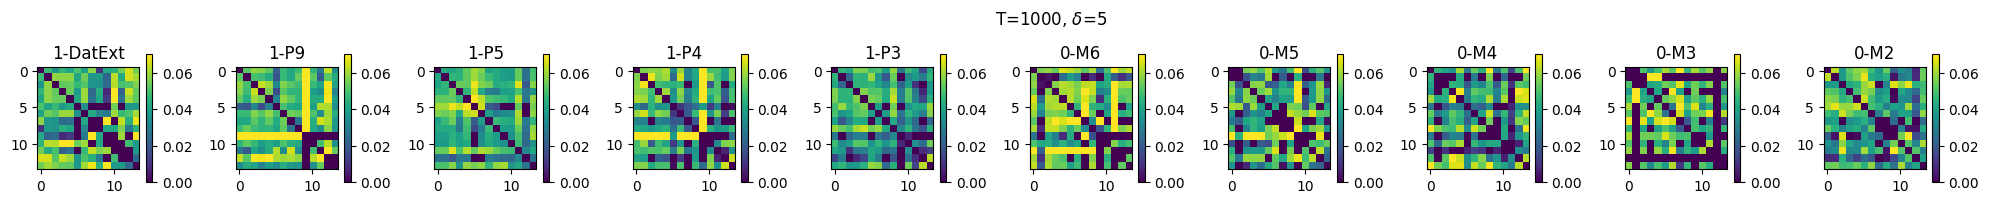

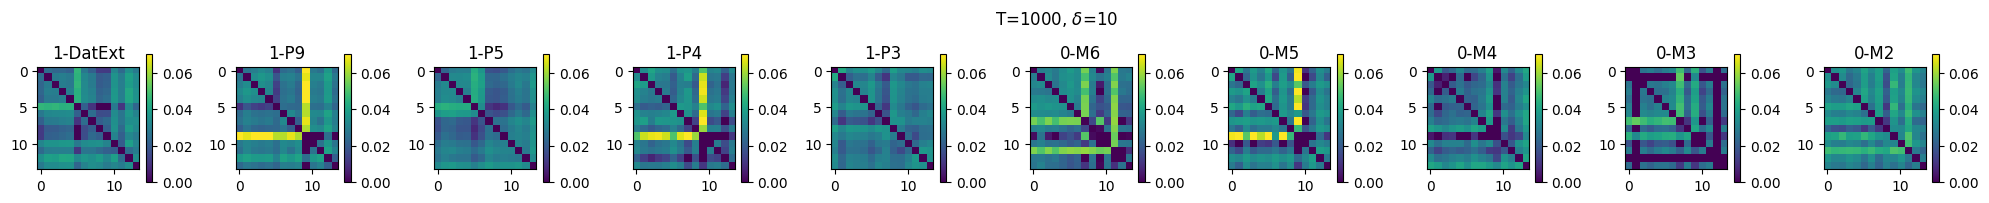

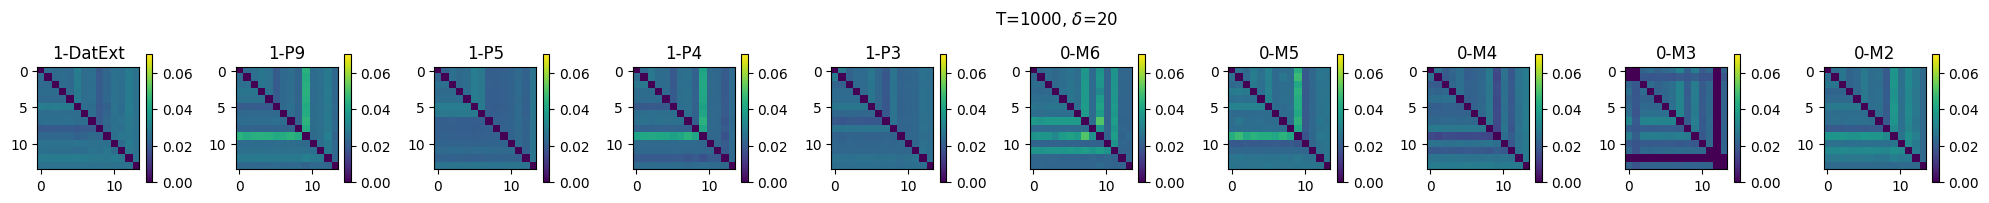

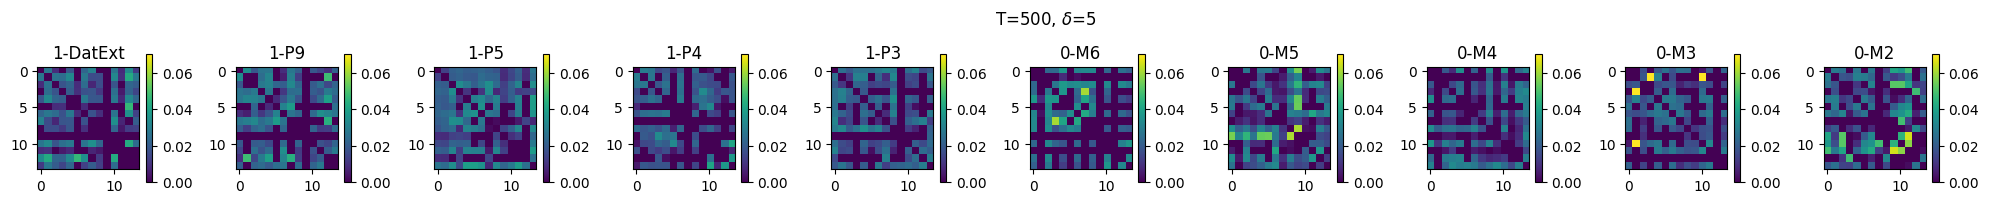

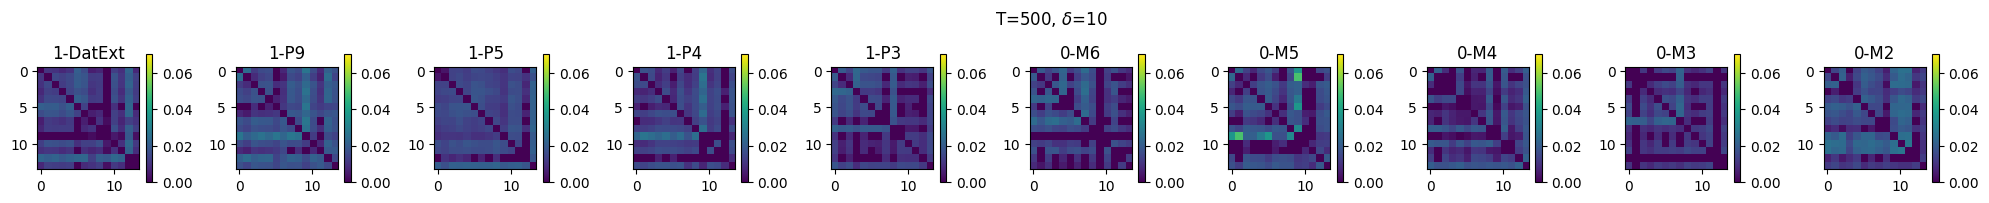

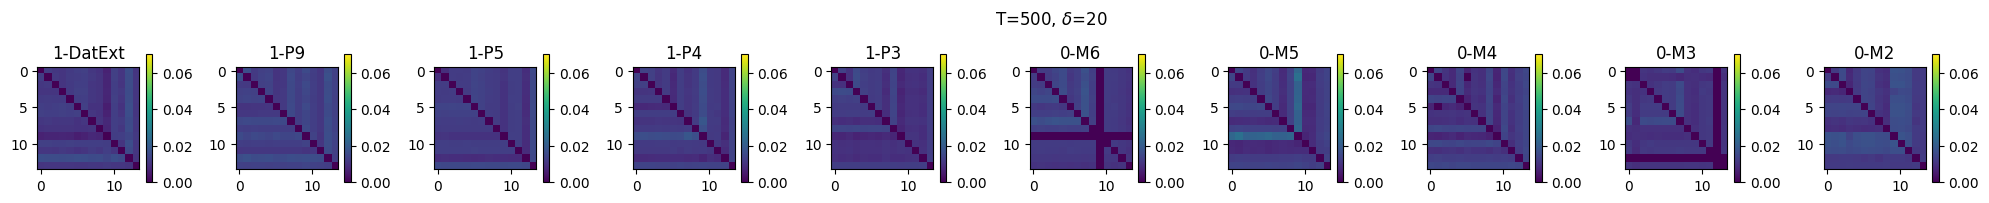

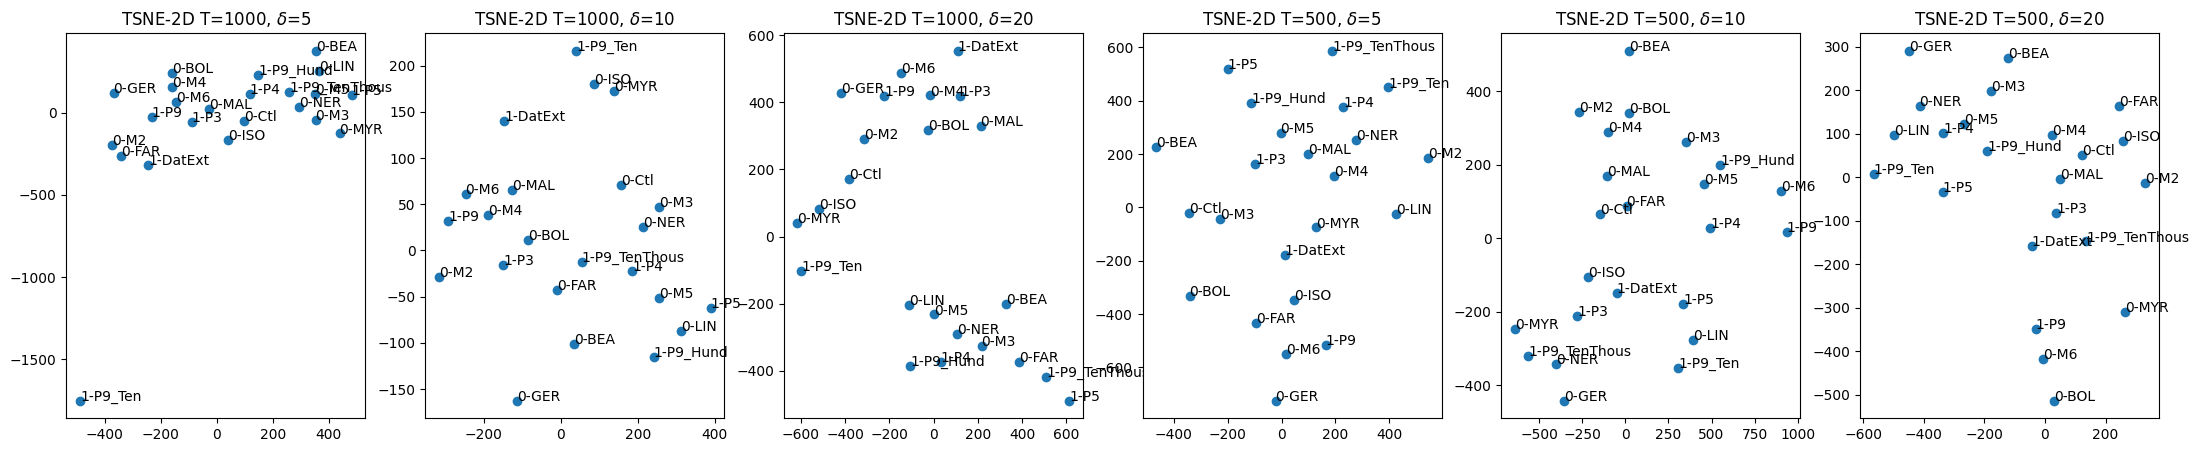

In [38]:
unsort_stim = ["0-Bea",	"0-Bol",	"0-Mal",	"0-Myr",	"0-Lin",	"0-Ner",	"0-Ger",	
               "0-Iso",	"0-Far",	"1-DatExt",	"1-P9",	"1-P9_Ten",	"1-P9_Hund",	
               "1-P9_TenThous",	"0-Ctl",	"1-P5",	"1-P4",	"1-P3",	"0-M6",	"0-M5",	"0-M4",	"0-M3",	"0-M2"]

stim_int = ["1-DatExt",	"1-P9",	"1-P5",	"1-P4",	"1-P3",
            "0-M6",	"0-M5",	"0-M4",	"0-M3",	"0-M2"]
sync_index = loadmat("070921_cleaned/sync_index_070921.mat")
triu_index = np.triu_indices(14,1)
all_stim_sync_index = []

numseq = [5,10]
binsize= [5,10,20]



for ns in numseq:
    for bs in binsize:
        count = 1
        plt.figure(figsize=(20,2))
        for i,stim in enumerate(unsort_stim):
            if stim in stim_int:
                empty_mat = np.zeros((14,14))
                empty_mat[triu_index] = sync_index["sync_index_070921_{}_{}".format(ns, bs)][i,:]
                full_mat = empty_mat + empty_mat.T
                all_stim_sync_index.append(full_mat)
                plt.subplot(1,10,count)
                plt.imshow(full_mat, vmin=0, vmax=0.07)
                plt.title(unsort_stim[i])
                plt.colorbar()
                count += 1
        plt.suptitle("T={}, ".format(int(5000/ns)) + r'$\delta$={}'.format(bs),horizontalalignment="left")
        plt.tight_layout()
        plt.savefig("sync_index_{}_{}.pdf".format(ns, bs))

sync_index_values = sync_index["sync_index_070921_10_5"]
tsne = TSNE(n_components=2, perplexity=5)
a = tsne.fit_transform(sync_index_values)
fig, axes = plt.subplots(figsize=(27,5), ncols=6)
count = 0
for ns in numseq:
    for bs in binsize:
        sync_index_values = sync_index["sync_index_070921_{}_{}".format(ns, bs)]
        tsne = TSNE(n_components=2, perplexity=5)
        a = tsne.fit_transform(sync_index_values)
        axes[count].scatter(a[:,0], a[:,1])
        for i in range(0, len(a)):
            axes[count].annotate(stimuli[i], (a[i,0], a[i,1]))
            
        axes[count].set_title("TSNE-2D T={}, ".format(int(5000/ns)) + r'$\delta$={}'.format(bs))
        count += 1
        
plt.savefig("2dTSNE_sync_index.pdf", bbox_inches="tight")

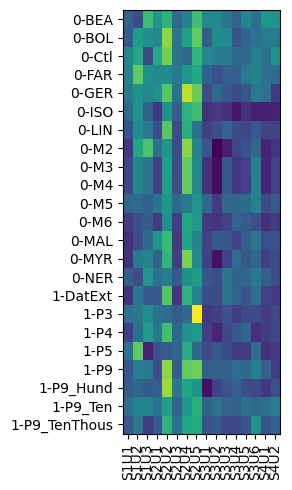

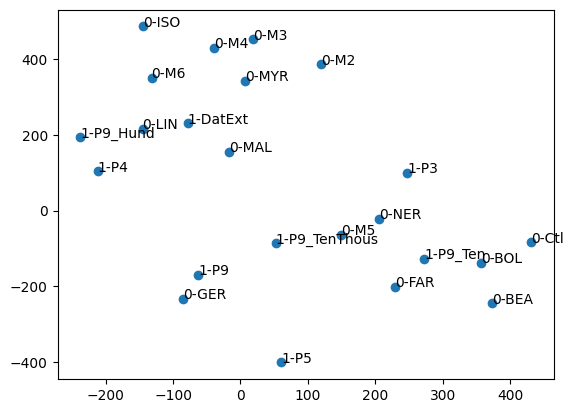

In [11]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,14):
    #att_betai, _, att_ensemble, _ = analyze_betai(yaml_filepath="config/070924_1/attflow/attflow-{}.yaml".format(target), 
    #                                                               cond=False)
    #spa_att_betai, _, spa_att_ensemble, _ = analyze_betai(yaml_filepath="config/070924_1/sparse-attflow/sparse-attflow-{}.yaml".format(target), 
    #                                                               cond=False)
    #attcond_betai, _, attcond_ensemble, _ = analyze_betai(yaml_filepath="config/070924_1/attflow/attflow-{}.yaml".format(target),
    #                                                                           cond=True)
    spa_attcond_betai, _, spa_attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/070924_1/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    
    #dur_attcond_stim_ensemble_average.append(attcond_ensemble)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average).mean(0).mean(0)
tsne = TSNE(n_components=2, perplexity=5)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))

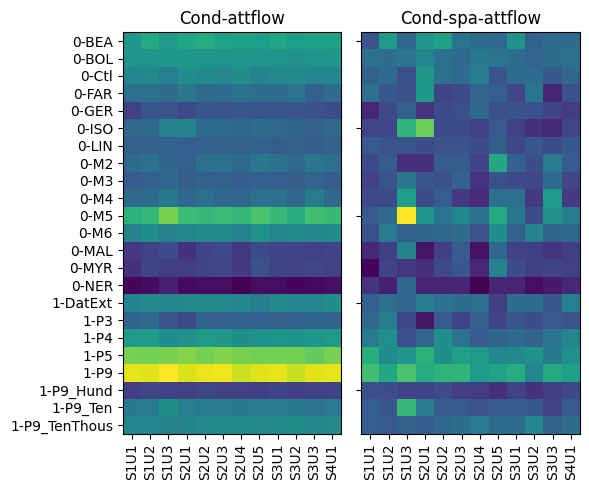

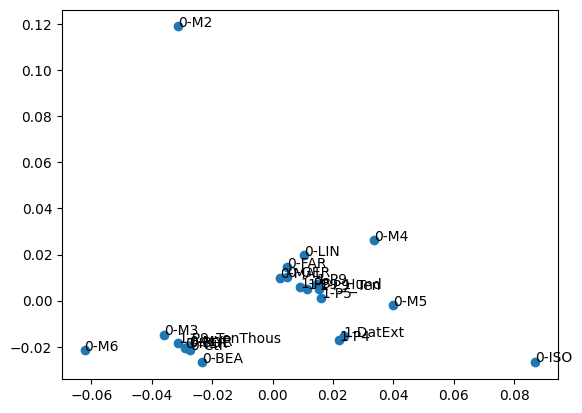

In [6]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,12):
    #att_betai, _, att_ensemble, _ = analyze_betai(yaml_filepath="config/070906/attflow/attflow-{}.yaml".format(target), 
    #                                                               cond=False)
    #spa_att_betai, _, spa_att_ensemble, _ = analyze_betai(yaml_filepath="config/070906/sparse-attflow/sparse-attflow-{}.yaml".format(target), 
    #                                                               cond=False)
    attcond_betai, _, attcond_ensemble, _,neurons = analyze_betai(yaml_filepath="config/070906/attflow/attflow-{}.yaml".format(target),
                                                                               cond=True)
    spa_attcond_betai, _, spa_attcond_ensemble, _,_ = analyze_betai(yaml_filepath="config/070906/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    
    dur_attcond_stim_ensemble_average.append(attcond_ensemble)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_attcond_stim_ensemble_average,0), np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-attflow","Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = PCA(n_components=3)
a = tsne.fit_transform(mean_stim_beta)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.text(a[i,0], a[i,1], stimuli[i])
    
plt.show()


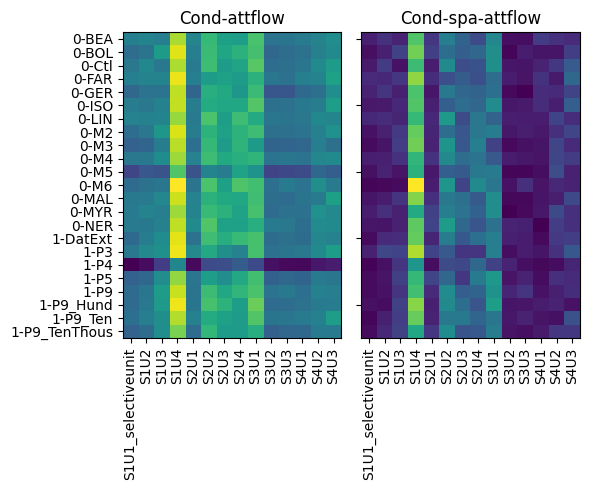

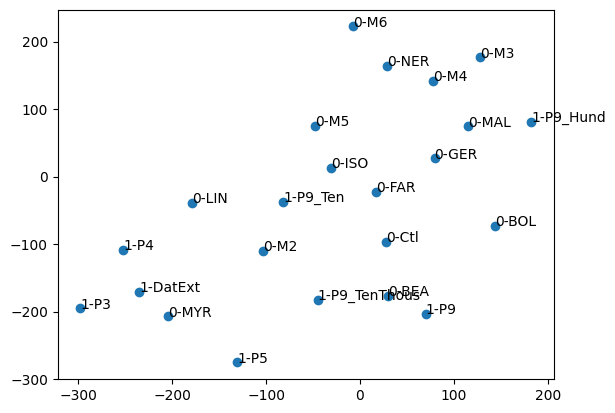

In [13]:
dur_attcond_stim_ensemble_average = []
dur_spa_attcond_stim_ensemble_average = []

for target in range(0,12):
    #att_betai, _, att_ensemble, _ = analyze_betai(yaml_filepath="config/071002/attflow/attflow-{}.yaml".format(target), 
    #                                                               cond=False)
    #spa_att_betai, _, spa_att_ensemble, _ = analyze_betai(yaml_filepath="config/071002/sparse-attflow/sparse-attflow-{}.yaml".format(target), 
    #                                                               cond=False)
    attcond_betai, _, attcond_ensemble, _, neurons = analyze_betai(yaml_filepath="config/071002/attflow/attflow-{}.yaml".format(target),
                                                                               cond=True)
    spa_attcond_betai, _, spa_attcond_ensemble, _,_ = analyze_betai(yaml_filepath="config/071002/sparse-attflow/sparse-attflow-{}.yaml".format(target),
                                                                               cond=True)
    
    dur_attcond_stim_ensemble_average.append(attcond_ensemble)
    dur_spa_attcond_stim_ensemble_average.append(spa_attcond_ensemble)
    
plot_ensemble([np.mean(dur_attcond_stim_ensemble_average,0), np.mean(dur_spa_attcond_stim_ensemble_average,0)], 
              ["Cond-attflow","Cond-spa-attflow"], 
              "ALL",
              q_labels=stimuli,
              neurons=neurons,
              section="During")

mean_stim_beta = np.array(dur_spa_attcond_stim_ensemble_average)[0].mean(0)
tsne = PCA(n_components=2)
a = tsne.fit_transform(mean_stim_beta)
fig, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1])
for i in range(0, len(a)):
    ax.annotate(stimuli[i], (a[i,0], a[i,1]))
    
plt.show()